# Importação de Bibliotecas

In [1]:
#importando bibliotecas
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carga de Dados

In [2]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Credit Risk/base/credit.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

In [3]:
#Treinando o modelo
credit_data = GaussianNB()
credit_data.fit(x_train, y_train)

GaussianNB()

In [4]:
#Gerando previsões para a classe x_test
previsoes = credit_data.predict(x_test)

In [5]:
#Acurácia do modelo
accuracy_score(y_test, previsoes)

0.7992941537517263

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      5179
         1.0       0.56      0.10      0.17      1338

    accuracy                           0.80      6517
   macro avg       0.69      0.54      0.53      6517
weighted avg       0.76      0.80      0.74      6517



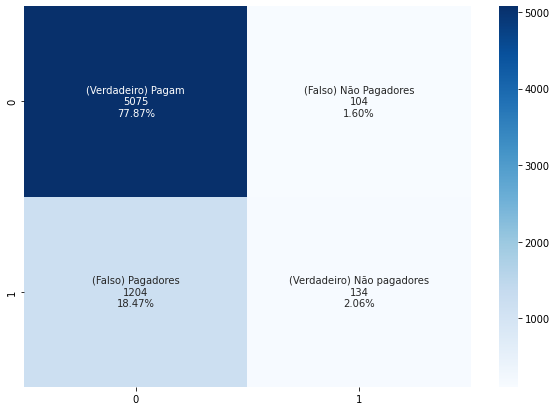

In [6]:
#Resultado da Classificação



print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)